https://stackoverflow.com/questions/77592064/how-do-i-find-the-uncertainties-on-a-fit-with-correlated-parameters-in-python

In [147]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [2]:
def model(x, a , b):
    return (a + b) * x**2 + (a - b) * x - 2.6

In [3]:
np.random.seed(12345)
x = np.linspace(-1, 1, 30)
p0 = np.array([3, 2])
y = model(x, *p0)
s = 0.1 * np.ones_like(y)
n = s * np.random.normal(size=y.size)
yn = y + n

In [4]:
popt, pcov = optimize.curve_fit(model, x, yn, sigma=s, absolute_sigma=True)
popt, pcov

(array([3.02853144, 2.02814927]),
 array([[0.00059905, 0.00013131],
        [0.00013131, 0.00059905]]))

In [158]:
def jacobian(x):
    def function(p):
        return model(x, *p)
    return nd.Gradient(function)

In [159]:
def error(p, C):
    @np.vectorize
    def function(x):
        J = jacobian(x)(p)
        return J @ C @ J.T
    return function

In [160]:
F = error(popt, pcov)

In [161]:
xlin = np.linspace(-1, 1, 200)

In [162]:
e = F(xlin)

In [163]:
ylin = model(xlin, *popt)

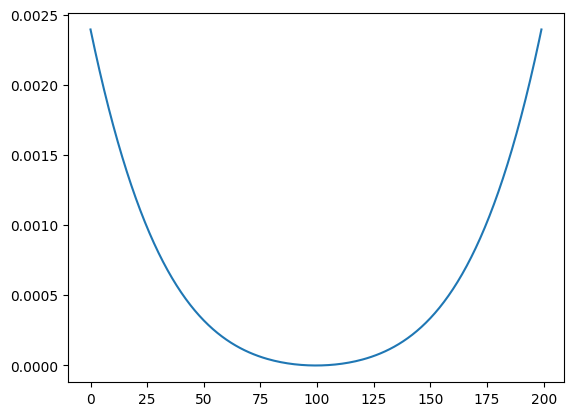

In [164]:
fig, axe = plt.subplots()
axe.plot(e)

In [165]:
z = stats.norm.ppf(1 - 0.0005)

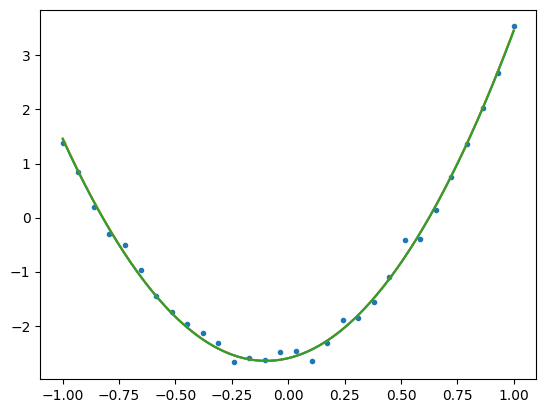

In [166]:
fig, axe = plt.subplots()
axe.scatter(x, yn, marker=".")
axe.plot(xlin, ylin)
axe.plot(xlin, ylin + z * e)
axe.plot(xlin, ylin - z * e)